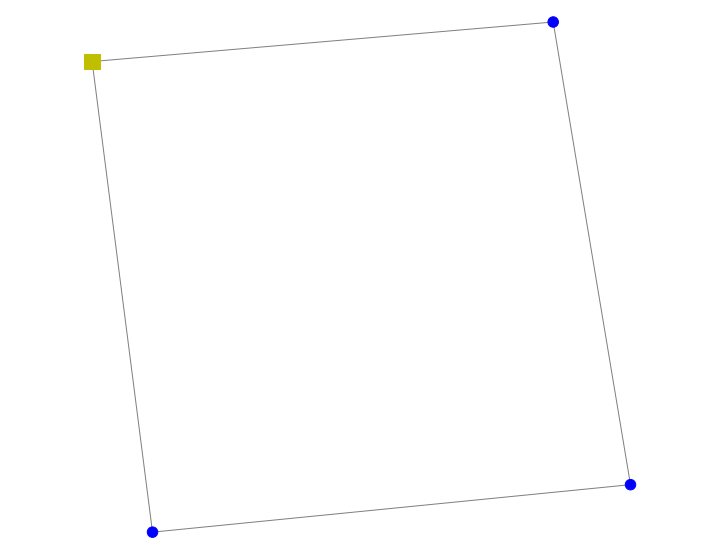

In [15]:
import pandapower as pp
import pandapower.networks as nw
import pandapower.plotting as plot

# Predefined network of IEEE 4gs bus system 
net = pp.networks.case4gs()
plot.simple_plot(net)

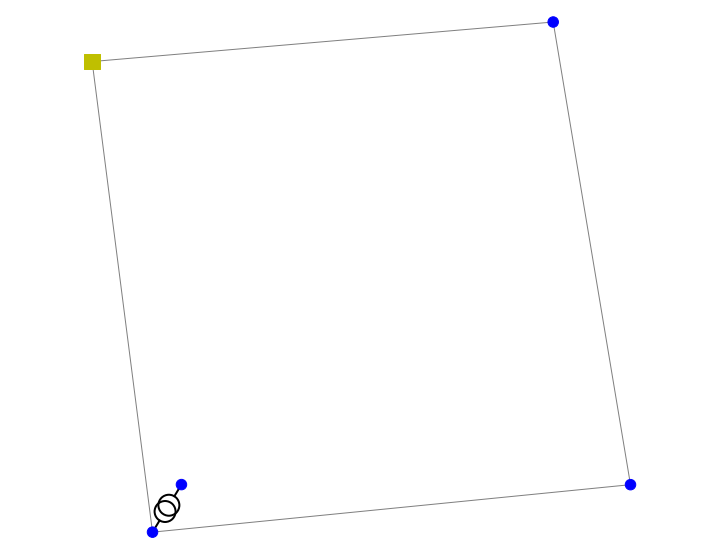

In [16]:
####Add shunt FACTS device (bus 1)
#MV bus
bus_SVC = pp.create_bus(net, name='MV SVCtrafo bus', vn_kv=69, type='n', geodata=(-2,2.5))
#Trafo
trafoSVC = pp.create_transformer_from_parameters(net, hv_bus=1, lv_bus=bus_SVC, in_service=True, 
                                                name='trafoSVC', sn_mva=110, vn_hv_kv=230 , vn_lv_kv=69, 
                                                vk_percent=12, vkr_percent=0.26, pfe_kw=55, i0_percent=0.06,
                                                shift_degree=0, tapside='hv', tap_neutral=0, tap_min=-9, tap_max=9,
                                                tap_step_percent=1.5, tap_step_degree=0, tap_phase_shifter=False) 
#Breaker between grid HV bus and trafo HV bus to connect buses
sw_SVC = pp.create_switch(net, bus=1, element=0, et='t', type='CB', closed=True)
#Shunt devices connected with MV bus
TSC1 = pp.create_shunt(net, bus_SVC, -50, in_service=True, name='TSC1', step = 1)
TSC2 = pp.create_shunt(net, bus_SVC, -50, in_service=True, name='TSC2', step = 1)
TCR = pp.create_shunt(net, bus_SVC, 1.5, in_service=True, name='TCR', step = 100)
plot.simple_plot(net)


In [17]:
#Add series device (at line 2, in middle between bus 1 and 3)

In [18]:
pp.runpp(net)

In [19]:
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.000000,0.000000,-137.431335,-103.499922
1,0.972257,-0.885306,170.000000,105.350000
2,0.969005,-1.872732,200.000000,123.940000
3,1.020000,1.521568,-238.000000,-159.505331
4,0.921960,-0.822746,0.000000,42.500558


In [20]:
net.res_shunt

,p_mw,q_mvar,vm_pu
0,0.0,-42.500558,0.92196
1,0.0,-42.500558,0.92196
2,0.0,127.501673,0.92196


In [21]:
net.switch.loc[0, 'closed'] = False
pp.runpp(net)
net.res_shunt

,p_mw,q_mvar,vm_pu
0,0.0,-0.0,0.0
1,0.0,-0.0,0.0
2,0.0,0.0,0.0
